<a href="https://colab.research.google.com/github/Kennethdjasmin/FoDS/blob/Final_Project/Air_Traffic_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Imports Libraries & dataset

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

In [53]:
#The data used for this analysis is the SFO International airport passenger statistic for 2005 - 2016
#Although the data for 2016 is rather incomplete, which will be sorted in the data cleaning section.

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/Kennethdjasmin/FoDS/Final_Project/Air_Traffic_Passenger_Statistics.csv')

In [55]:
df.head()

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [56]:
df.describe()

,index,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,15007.00000,15007.000000,15007.000000,15007.000000,15007.000000
mean,7503.00000,201045.073366,29240.521090,29331.917105,2010.385220
std,4332.29208,313.336196,58319.509284,58284.182219,3.137589
min,0.00000,200507.000000,1.000000,1.000000,2005.000000
25%,3751.50000,200803.000000,5373.500000,5495.500000,2008.000000
50%,7503.00000,201011.000000,9210.000000,9354.000000,2010.000000
75%,11254.50000,201308.000000,21158.500000,21182.000000,2013.000000
max,15006.00000,201603.000000,659837.000000,659837.000000,2016.000000


In [57]:
# Data Cleaning

In [58]:
print("Rows, Columns:", df.shape)
print("Total duplicates:", df.duplicated().sum())

Rows, Columns: (15007, 17)
Total duplicates: 0


In [59]:
view = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'Null %':df.isnull().sum() / len(df),
    'Type':df.dtypes.values
})

display(view)

,Unique,Null,Null %,Type
index,15007,0,0.000000,int64
Activity Period,129,0,0.000000,int64
Operating Airline,77,0,0.000000,object
Operating Airline IATA Code,73,54,0.003598,object
Published Airline,68,0,0.000000,object
Published Airline IATA Code,64,54,0.003598,object
GEO Summary,2,0,0.000000,object
GEO Region,9,0,0.000000,object
Activity Type Code,3,0,0.000000,object
Price Category Code,2,0,0.000000,object


In [60]:
df_new = df.drop(columns=['index','Operating Airline IATA Code',
                      'Published Airline IATA Code','Adjusted Passenger Count','Adjusted Activity Type Code'],axis=1)
df_new = df_new[df_new.Year != 2016]

df_new

# Theres 54 missing datas in 2 different columns, but we don't need 
# the Operating Airline IATA Code & Published Airline IATA Code anyways
# so we'll just dump them here and several other irrelevant columns

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,July
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,July
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,July
3,200507,Air Canada,Air Canada,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,July
4,200507,Air Canada,Air Canada,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...
14632,201512,Virgin America,Virgin America,Domestic,US,Enplaned,Low Fare,Terminal 2,D,182975,2015,December
14633,201512,Virgin America,Virgin America,International,Mexico,Deplaned,Low Fare,International,A,4381,2015,December
14634,201512,Virgin America,Virgin America,International,Mexico,Enplaned,Low Fare,Terminal 2,D,5273,2015,December
14635,201512,Virgin Atlantic,Virgin Atlantic,International,Europe,Deplaned,Other,International,A,10661,2015,December


In [61]:
# Here we look for the unique values in each column,
# so we can get a clear idea on the kind of data 
# we're dealing with

for col in df_new.columns:
  print(col, 'unique: \n', df_new[col].unique(), "\n")

Activity Period unique: 
 [200507 200508 200509 200510 200511 200604 200512 200601 200602 200603
 200605 200607 200606 200608 200609 200707 200610 200611 200612 200701
 200702 200703 200704 200705 200706 200708 200709 200805 200710 200711
 200712 200801 200802 200803 200804 201103 200806 201107 201110 200807
 200808 200809 200810 200811 200812 200901 201206 200902 200903 200904
 200905 200906 200907 200908 200909 200910 200911 200912 201001 201002
 201003 201004 201005 201006 201007 201008 201009 201010 201011 201012
 201101 201102 201104 201105 201106 201108 201109 201111 201112 201201
 201202 201203 201204 201205 201207 201208 201209 201210 201211 201212
 201306 201301 201302 201303 201304 201305 201307 201308 201309 201310
 201407 201311 201312 201507 201401 201402 201403 201404 201405 201406
 201408 201409 201410 201411 201412 201501 201502 201503 201504 201505
 201506 201508 201509 201510 201511 201512] 

Operating Airline unique: 
 ['ATA Airlines' 'Air Canada ' 'Air China' 'Air F

In [62]:
num_df = df_new
for col in df_new.columns:
  if col == "Passenger Count" or col == "Year" or col == "Activity Period":
    pass
  else:
    num_df[col] = pd.factorize(df_new[col])[0].astype(int)

num_df.info()
num_df

# Right, the function pandas.factorize() here returns 2 values, first is the values of the 
# dataframe converted to a number, second is all the unique values in the dataframe
# Which is why it returns in 'tuples' data type, hence the conversion into int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14636 entries, 0 to 14636
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Activity Period      14636 non-null  int64
 1   Operating Airline    14636 non-null  int64
 2   Published Airline    14636 non-null  int64
 3   GEO Summary          14636 non-null  int64
 4   GEO Region           14636 non-null  int64
 5   Activity Type Code   14636 non-null  int64
 6   Price Category Code  14636 non-null  int64
 7   Terminal             14636 non-null  int64
 8   Boarding Area        14636 non-null  int64
 9   Passenger Count      14636 non-null  int64
 10  Year                 14636 non-null  int64
 11  Month                14636 non-null  int64
dtypes: int64(12)
memory usage: 1.5 MB


,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,200507,0,0,0,0,0,0,0,0,27271,2005,0
1,200507,0,0,0,0,1,0,0,0,29131,2005,0
2,200507,0,0,0,0,2,0,0,0,5415,2005,0
3,200507,1,1,1,1,0,1,0,0,35156,2005,0
4,200507,1,1,1,1,1,1,0,0,34090,2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14632,201512,53,46,0,0,1,0,4,7,182975,2015,6
14633,201512,53,46,1,5,0,0,1,2,4381,2015,6
14634,201512,53,46,1,5,1,0,4,7,5273,2015,6
14635,201512,39,34,1,3,0,1,1,2,10661,2015,6


In [63]:
# Visualisation

In [64]:
# temp_df = num_df.groupby(['Year'], as_index=False).sum()

# temp_df = num_df.groupby(['Activity Period', 'Operating Airline'], as_index=False).sum()
# # temp_df = temp_df['Passenger Count'].sum()

# # temp_df = num_df.groupby(['Year', 'Month'], as_index=False).sum()

# temp_df

# # y = temp_df.rolling(12).mean
# x = temp_df['Activity Period']
# temp_df['Passenger Count'].sum()

# plt.plot(temp_df['Activity Period'], temp_df['Operating Airline'], color='pink', marker='o')
# plt.title('Passenger count 2005 - 2016', fontsize=14)
# plt.xlabel('year', fontsize=14)
# plt.ylabel('Passenger count', fontsize=14)
# plt.grid(True)
# plt.show()

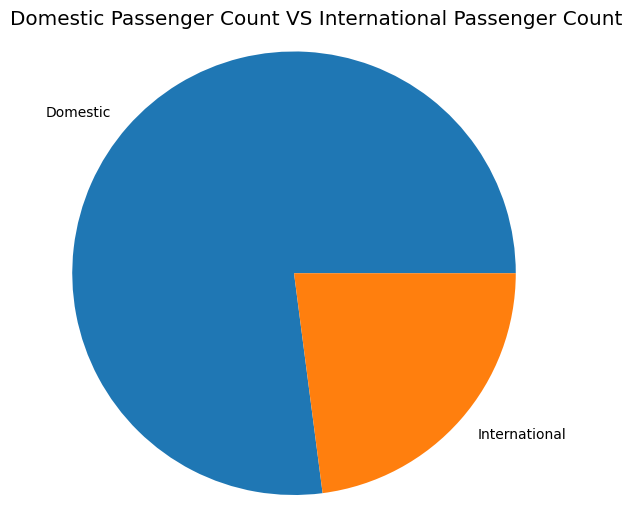

In [97]:
GEO_Summary = df_new.groupby('GEO Summary').agg({"Passenger Count":sum})
labels1=['Domestic', 'International']
plt.pie(x=GEO_Summary['Passenger Count'],labels=labels1,radius=1.5)
plt.title("Domestic Passenger Count VS International Passenger Count",fontsize='x-large',x=0.56,y=1.15)
plt.show()

In [98]:
#Domestic vs International Passenger count
GEO_Summary

,Passenger Count
GEO Summary,
0,329334383
1,98048270


Text(0, 0.5, 'Passenger Count')

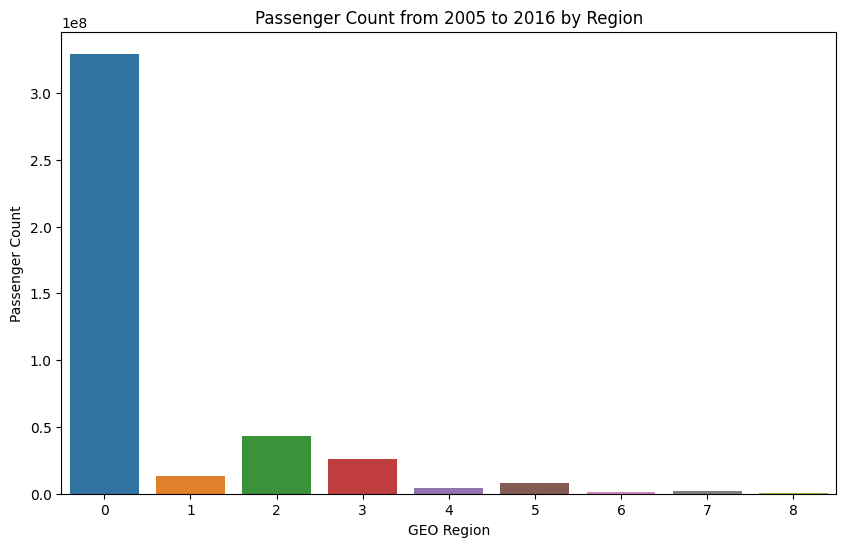

In [66]:
plt.figure(figsize=(10,6))

plt.title("Passenger Count from 2005 to 2016 by Region")
GEO_Region = df_new.groupby('GEO Region').agg({"Passenger Count":sum})

sns.barplot(x=GEO_Region.index, y=GEO_Region['Passenger Count'])
plt.ylabel("Passenger Count")

In [67]:
#Yearly passenger count based on each GEO Region

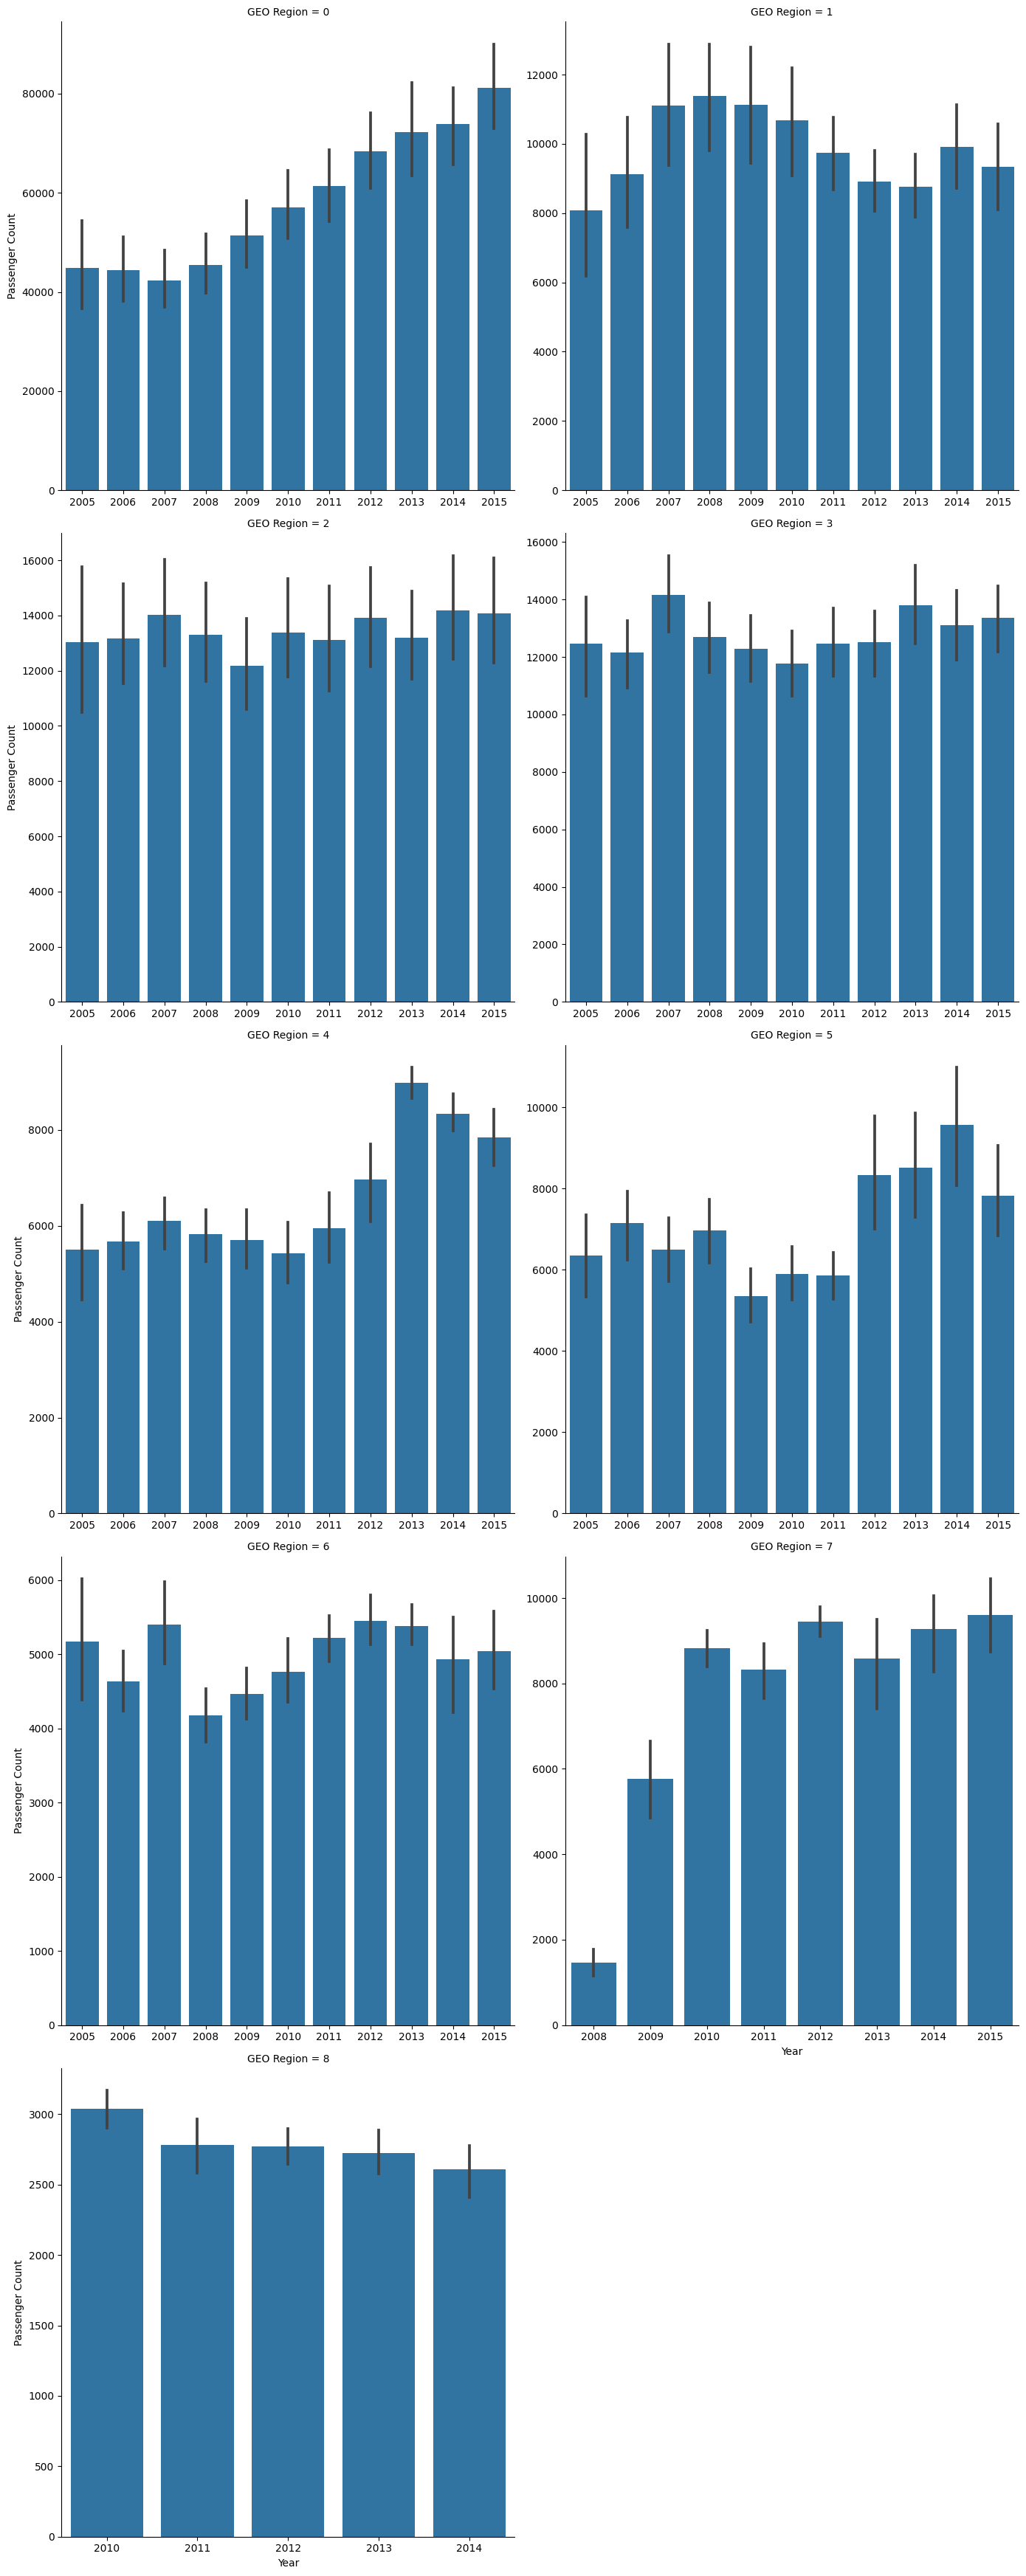

In [68]:
g = sns.FacetGrid(df_new, col='GEO Region',col_wrap=2,
                  height=7,sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='Year', y='Passenger Count')

In [69]:
#Passenger count based on month and year

<ipython-input-70-cc31d078b504>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-70-cc31d078b504>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




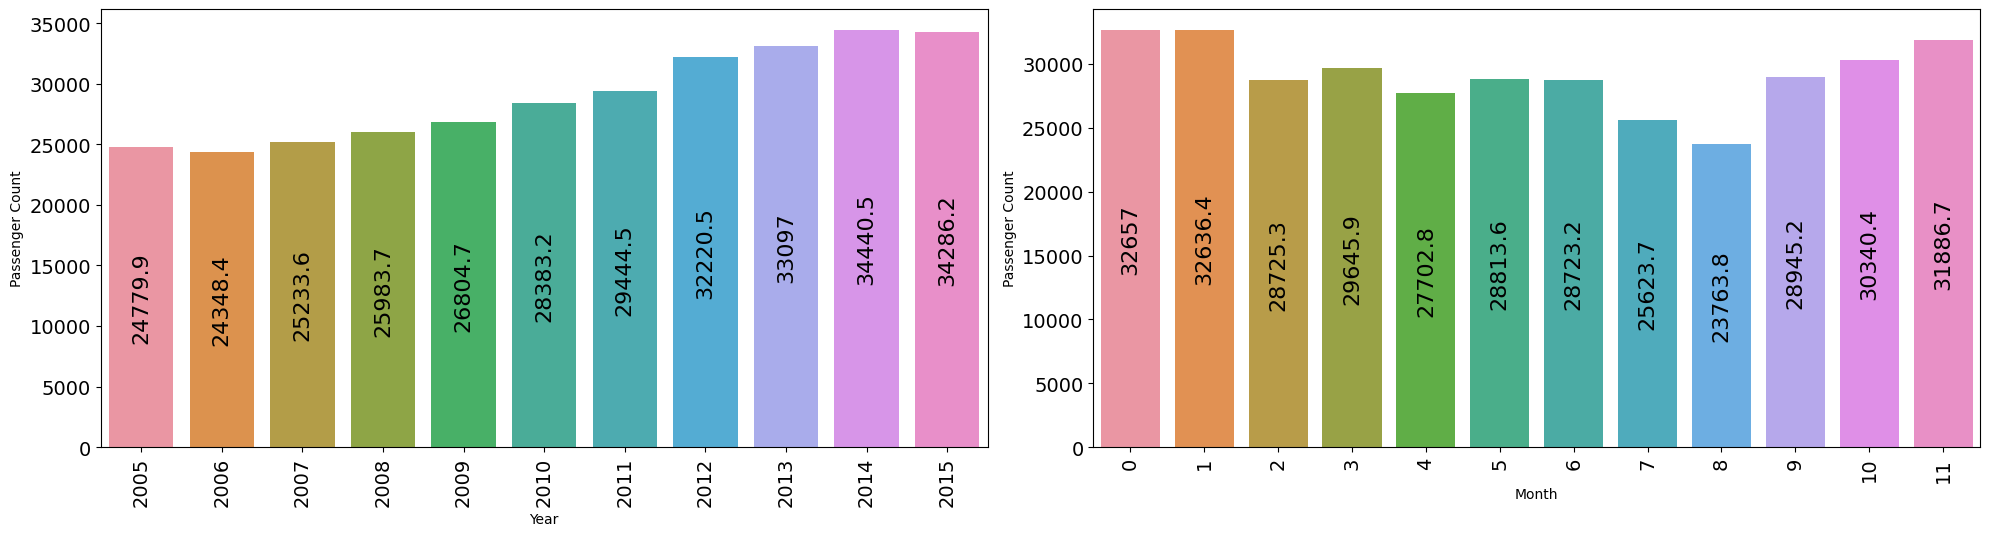

In [70]:
column = ['Year','Month']
plt.figure(figsize=(20,10))
for i, col in enumerate(column):
    axes = plt.subplot(2,2,i + 1)
    sns.barplot(x=df_new[col], y=df_new['Passenger Count'], ci=None)
    plt.xticks(fontsize=14, rotation=90)
    plt.yticks(fontsize=14)
    for n in axes.containers:
        axes.bar_label(n, fontsize=16, rotation=90, label_type='center')
plt.tight_layout()
plt.show()

In [71]:
#10 most frequest airlines

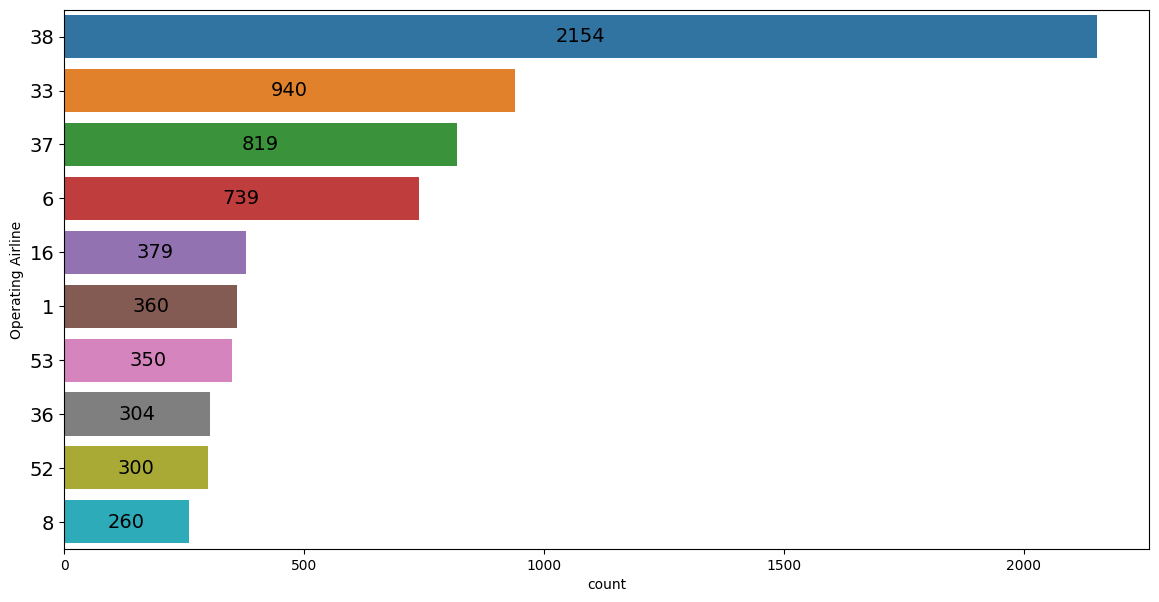

In [72]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(y=df_new['Operating Airline'], order=df_new['Operating Airline'].value_counts().index[0:10])
for n in ax.containers:
    ax.bar_label(n, label_type='center', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [73]:
#Yearly Passenger count for 10 most frequent Airlines

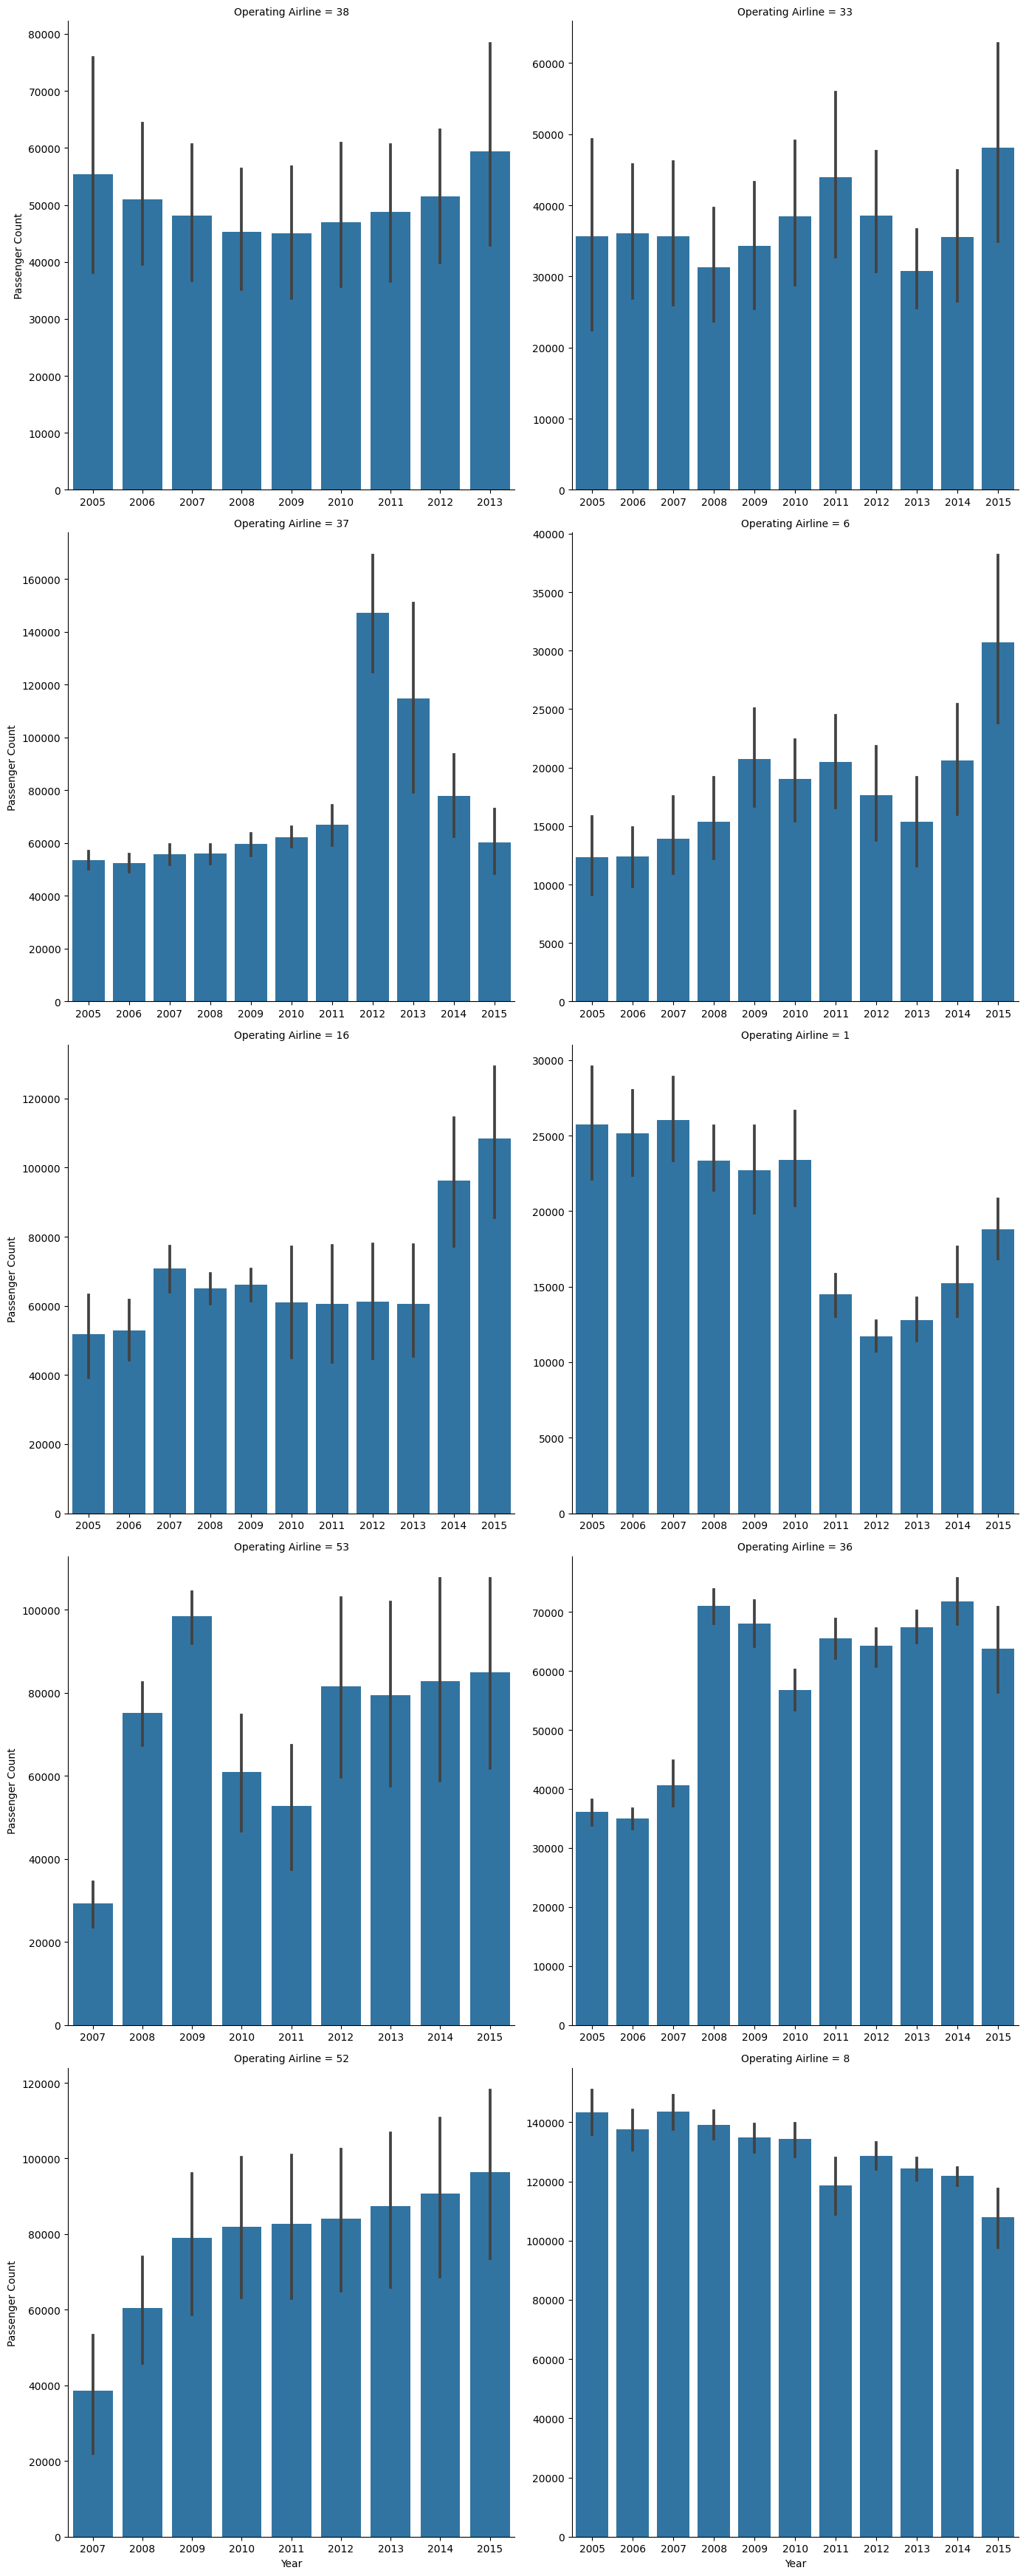

In [74]:
g = sns.FacetGrid(df_new, col='Operating Airline', col_wrap=2, 
                  height=7,col_order=df_new['Operating Airline'].value_counts().index[0:10],sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='Year', y='Passenger Count')

In [75]:
joint_data=df_new.sort_values(by='Year', ascending=False)

top_rated=joint_data[:5500]
fig =px.sunburst(
    top_rated,
    path=['Year',"Operating Airline"],
    values='Year',
    color='Year')
fig.show()

In [76]:
#Yearly passenger count based on price category

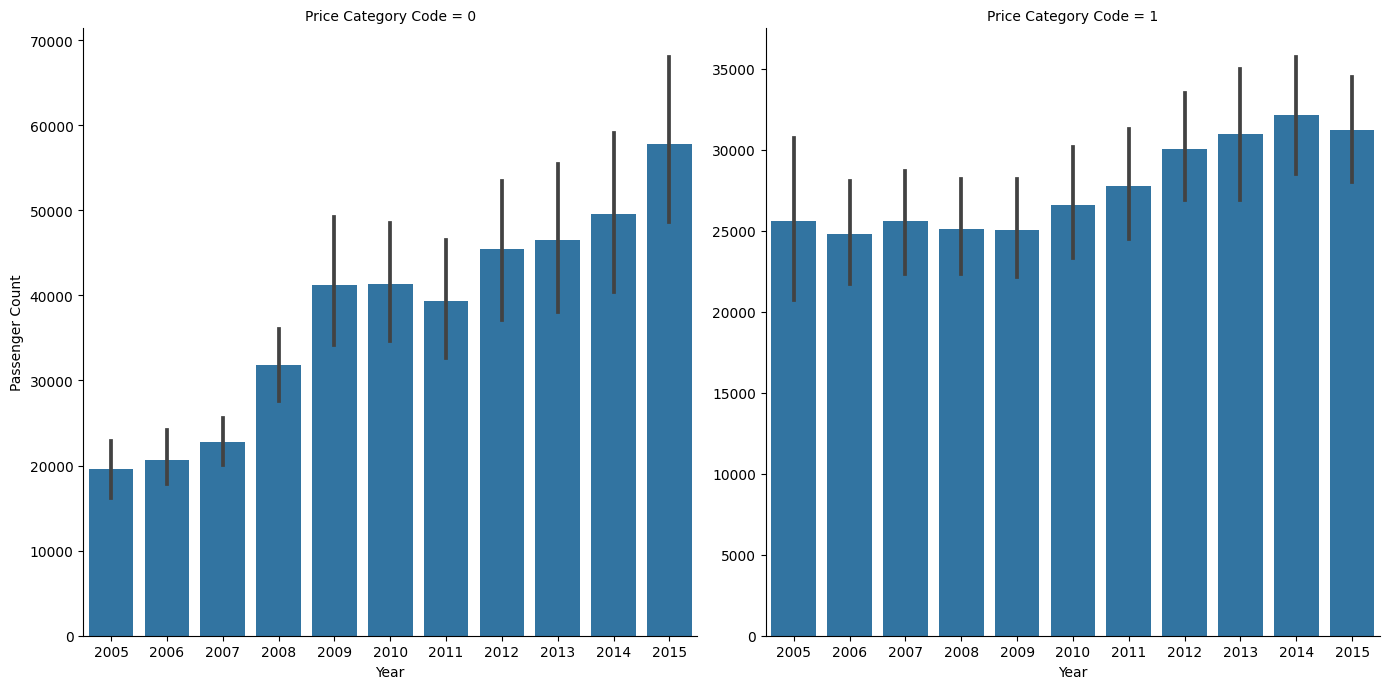

In [77]:
g = sns.FacetGrid(df_new, col='Price Category Code',
                  height=7,sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x='Year', y='Passenger Count')

In [78]:
#Interestingly the data shows 2005 having a higher passenger count on the 'other' price category, 
#there are only 2 types of price category provided by the data, assuming the 'other' price category
#as the premium option, San Francisco is surprisingly well off in 2005. This data aligns well with
#the information from 'opendatanetwork.com'. According to the data provider, there was a significant
#increasing trend San Francisco GDP per capita from 2003 before reaching its peak at 2008 and entered
#a recession afterwards, which explains the increasing trend for the 'low fare' which peaks at 2015, 
#the same year the U.S. economy suffered a year long recession. 

In [ ]:
#Correlation coefficient graph

Index(['Passenger Count', 'Boarding Area', 'Terminal', 'Published Airline',
       'Operating Airline', 'Activity Period', 'Year', 'Month',
       'Price Category Code', 'Activity Type Code'],
      dtype='object')


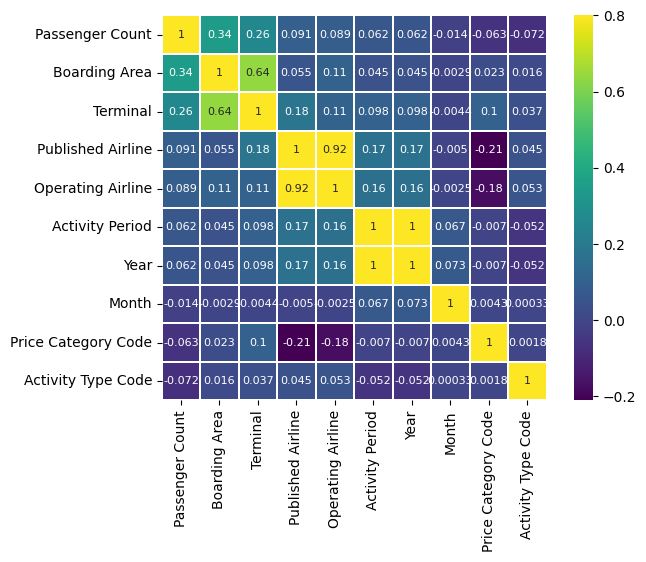

In [90]:
correlation=num_df.corr()
k= 10
cols = correlation.nlargest(k,'Passenger Count')['Passenger Count'].index
print(cols)
cm = np.corrcoef(num_df[cols].values.T)
f , ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':8},yticklabels = cols.values)
plt.show()

In [ ]:
#Simply by looking at the correlation coefficient graph the data is not suitable for machine learning and prediction algorithms.
#Reason being most of the values tend towards 0 rather than -1 or 1.